## Observations and Insights 

In [65]:
# Dependencies and Setup ##TESTING CHANGE PUSH
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np




# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [66]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [67]:
# Checking the number of mice.
x = combined_data['Mouse ID'].count()
#number of mice 1893
x

1893

In [68]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [69]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_rows = combined_data[combined_data.duplicated(['Mouse ID',])]
all_duplicate_rows
#1644 rows x 8 columns
#checkpoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [70]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates("Mouse ID")
clean_data
#249 rows by 8 columns

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [71]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_data['Mouse ID'].count()
clean_mouse_count
#249
#checkpoint

249

## Summary Statistics

In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = pd.DataFrame(combined_data.groupby("Drug Regimen").count())

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary["Mean"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summary["Median"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summary["Standard Deviation"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summary["Variance"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summary["SEM"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

summary = summary[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]
# Assemble the resulting series into a single summary dataframe.
#summary_data = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary
#checkpoint
#Rename count column
#summary = summary.rename(columns = {"Mouse ID" : "TrialNum"})

summary.head(10)

,Mouse ID,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,181,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,161,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,228,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,181,54.233149,52.431737,7.710419,59.450562,0.573111


In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#checkpoint
# Using the aggregation method, produce the same summary statistics in a single line
summary.agg({
            "Mouse ID": ["mean", "median","var", "sem"],
           })



,Mouse ID
mean,189.300000
median,181.500000
var,490.455556
sem,7.003253


In [74]:
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [75]:
clean_mouse_count

249

In [76]:
 # Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_data = pd.DataFrame(combined_data.groupby(["Drug Regimen"]).count()).reset_index()
#dataframe down to two columns
drugs_df = drug_data[["Drug Regimen", "Mouse ID"]]
drugs_df = drugs_df.set_index("Drug Regimen")

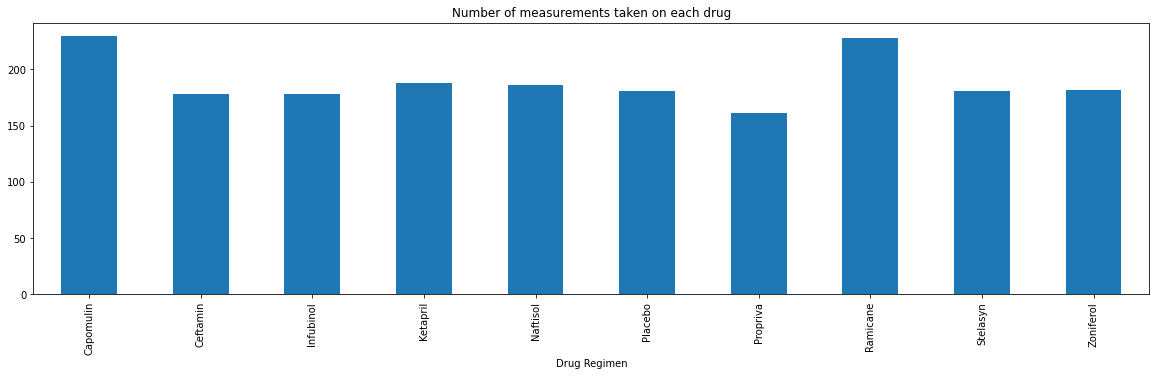

<Figure size 432x288 with 0 Axes>

In [77]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Use df.plot()
drugs_df.plot(kind="bar", figsize=(20,5), legend=False)

# Set a title for the chart
plt.title("Number of measurements taken on each drug")

plt.show()
plt.tight_layout()
#checkpoint

In [78]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#make list - for counts
drug_count = (combined_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
#drug_count

#make list - for drugs
drug_list = drugs_df.index.tolist()
drug_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

## Bar and Pie Charts

Text(0, 0.5, '# of Treatments')

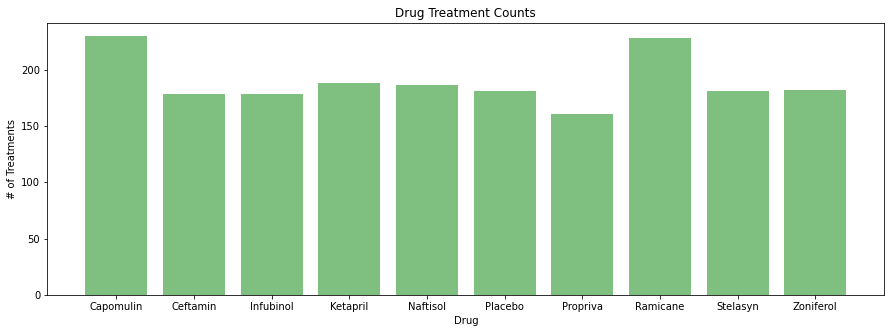

In [79]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_count))

#x axis
x_axis = drug_list

#plt.figure and plt.bar
plt.figure(figsize=(15,5))
plt.bar(x_axis, drug_count, color='g', alpha=0.5, align="center")

#name title, xlabel, and y label
plt.title("Drug Treatment Counts")
plt.xlabel("Drug")
plt.ylabel("# of Treatments")
#checkpoint

In [80]:
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [81]:
#need data by gender
gender_data = pd.DataFrame(clean_data.groupby(["Sex"]).count()).reset_index()
gender_data.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,124,124,124,124,124,124,124
1,Male,125,125,125,125,125,125,125


In [82]:
gender_data = gender_data[["Sex","Mouse ID"]]
gender_data.head()

,Sex,Mouse ID
0,Female,124
1,Male,125


Text(0, 0.5, '')

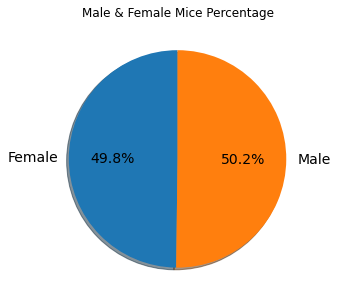

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121, aspect="equal")
gender_data.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=90, shadow=True, labels=gender_data["Sex"], legend = False, fontsize=14)

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")
#checkpoint

(-1.3151346048640975, 1.112711258980445, -1.104752213306557, 1.104224867961757)

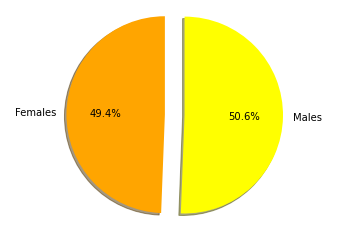

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (combined_data.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

#pie labels, colors, and if want to explode - why not?!
labels = ["Females", "Males"]
colors = ["orange", "yellow"]
explode = (0.2, 0)

plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
#checkpoint

## Quartiles, Outliers and Boxplots

In [86]:
# only want for the 4 drugs: Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_data2 = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin") | (combined_data["Drug Regimen"] == "Ramicane") | (combined_data["Drug Regimen"] == "Infubinol") | (combined_data["Drug Regimen"] == "Ceftamin"), :]
filtered_data2.head()

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(filtered_data2.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_timepoint

# Merge max timepoint
merged_datafile = pd.merge(filtered_data2, max_timepoint, on='Mouse ID')
merged_datafile.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [87]:
# Put treatments into a list for for loop (and later for plot labels)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

#list creation
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []


for drug in drugs:
    
    temp_data = merged_datafile.loc[merged_datafile['Drug Regimen'] == drug]

    #subset
    final_volume_data = temp_data.loc[temp_data['Timepoint'] == temp_data['max_timepoint']]
    
    #series 
    values = final_volume_data['Tumor Volume (mm3)']
    drug_values.append(values)
    
    #IQR
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    #upper and lower bounds , for outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    #check for outliers
    outliers_count = (values.loc[(final_volume_data['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_data['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


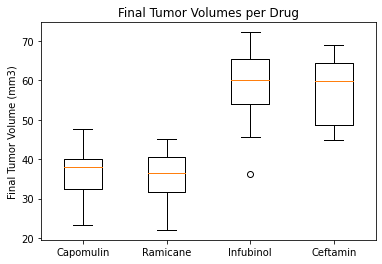

In [88]:
# Generate a box plot/box and whiskers plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(drug_values)

# title, xlabel, ylabel
plt.title('Final Tumor Volumes per Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()
#checkpoint

## Line and Scatter Plots

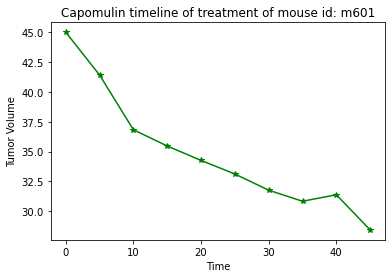

In [89]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#found mouse ID m601 was treated with capomulin from dataset

#datapoints
mouse = combined_data.loc[combined_data['Mouse ID'] == 'm601']

# plt.plot time on the x-axis and tumor volume values on y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = '*', color='g')

# Add labels and title to plot
plt.xlabel("Time")
plt.ylabel("Tumor Volume")
plt.title("Capomulin timeline of treatment of mouse id: m601")

plt.show()



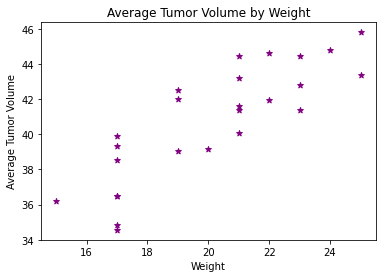

In [90]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#capomulin only dataset
capomulin_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']

#average volume data for each
avg_vol_data = pd.DataFrame(capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

#merge
avg_vol_data = pd.merge(capomulin_data, avg_vol_data, on='Mouse ID')

final_avg_vol_data = avg_vol_data[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_data

x = final_avg_vol_data['Weight (g)']
y = final_avg_vol_data['avg_tumor_vol']

#plt.scatter()
plt.scatter(x, y, marker="*", color='purple')

# Add labels and title to plot
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()
#checkpoint

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The correlation between the weight and the average tumor volume when
on Capomulin is 0.84.


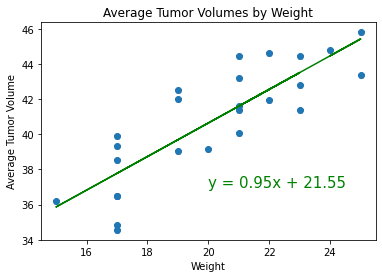

In [93]:
# Calculate the correlation coefficient and linear regression model 

#copy above scatter
capomulin_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']

#average volume data for each
avg_vol_data = pd.DataFrame(capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

#merge
avg_vol_data = pd.merge(capomulin_data, avg_vol_data, on='Mouse ID')

final_avg_vol_data = avg_vol_data[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_data

x = final_avg_vol_data['Weight (g)']
y = final_avg_vol_data['avg_tumor_vol']

#plt.scatter()
plt.scatter(x, y, marker="*", color='purple')

# Add labels and title to plot
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
plt.title('Average Tumor Volume by Weight')

#calculate correlation coefficient (st.pearsonr(x,y))
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between the weight and the average tumor volume when
on Capomulin is {round(correlation[0],2)}.""")


#calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot linear reg on scatter
plt.scatter(x,y)
plt.plot(x,regress_values,"green")

# plt.annotate - linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="green")

# Add labels and title to plot
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
plt.title('Average Tumor Volumes by Weight')
plt.show()


In [ ]:
#    Look across all previously generated figures and tables and write at least three observations 
#    or inferences that can be made from the data. Include these observations at the top of notebook
#checkpoint